# What is Pandas?

Pandas is a [package](https://data36.com/python-import-built-in-modules-data-science/) in Python, used for data formatting, analysis and manipulation. It gives you a way to deal with 2-D data structures (like SQL or Excel tables) in Python, which isn't "native" to the language. That's why we have to `import` the package. If you have Conda, you've already downloaded Pandas, we don't have to download it. By `import`-ing the package, we just allow the current .py or .ipynb file we're working on to use the functionality of the package.

### Why pandas?
- 2-D table-like data structures are intuitively known to us. Everyone is used to seeing Excel tables and this feels comfortable to work with. It is also what business people and other stakeholders will be used to seeing.
- It's one of the quickest ways to "automate the boring stuff" and lets you add value to any team quickly. 
- It plays well with other packages & libraries like `scikit-learn` and `matplotlib`.
- Excellent tools for transforming & cleaning data (i.e. resampling, filling missing values).
- Sits on top oy `numpy` - which can be fast if you vectorize calculations.

[For reference, you can use this great pandas cheat sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf).

### When Pandas?

In other iterations of this course, participants asked where Pandas fits in the DS/ML pipeline. Let's focus on that!

<img src="pics/ds_path.png">

[source](https://towardsdatascience.com/how-it-feels-to-learn-data-science-in-2019-6ee688498029)

<img src="pics/ds_pipeline.png">

[source](https://medium.com/dunder-data/how-to-learn-pandas-108905ab4955)

In [1]:
import pandas as pd

## Python data types

A quick review of the basic data structures in Python:

In [42]:
#float


In [43]:
#int


In [44]:
#str


In [45]:
#bool


In [46]:
#bool


In [47]:
#bool


## Pandas Data Types

Pandas has 2 main data structures:

- pd.Series:
    - 1-D data structure. Different from a numpy array in that each value has a unique ID.
    

- pd.DataFrame:
    - 2(+)-D data structure (better known as a table w/ named columns & numbered rows).
    
Here, we will focus on DataFrames:
- if you can do something in 2-D, you can also probably do it in 1-D.
- 2(+)-D data structures are much more useful to know how to work with in data science (you can't train a model with only 1 single array of data)
- the API between the Series can differ slightly (i.e. `pd.Series.name` vs `pd.DataFrame.columns`)

### Importing a DataFrame
Throughout this tutorial, we will use practice data sets. Here, we use a dataset of wine reviews.  

We use the read_csv function to load data from a csv file into a DataFrame:

In [11]:
wine = pd.read_csv('data/wine_reviews/winemag-data_first150k.csv', index_col=0)

### Quickly viewing data

The DataFrame is a Python object, with useful methods (i.e. functions) and attributes (often referring to simpler Python data types like floats or tuples).  

You can tell if it is a method by `()` at the end.  A method will run code - an attribute will refer to data that already exists (most of the time - see the `@property` decorator for more).

df - calling the DataFrame without any method or attribute reference will print the `__repr__` method of the class.  For a DataFrame, the Pandas developers chose to print the entire DataFrame (or, up to a set number of row - you can configure this number in the notebook settings.)

df.head() - shows first n rows (5 by default) _in order imported_! This is important as it is not sorted. So, the first row you see may not be the "actual" first row, or the first row you expect to see.

df.tail() - shows last n rows in order of imported (below we limit it to three)

df.shape - shows number of (rows, columns)

df.shape returns a tuple. We can use tuple indexes to quickly access just one of these.
**How many rows does our data have?**

We can also quickly look at the data types of each of our columns:
- each column has a single data type (due to the data being represented as numpy arrays
- pandas has figured out some of our columns dtypes for us

Also useful is df.describe() - a method which generates summary statistics of the columns:

## What is a DataFrame made of?

Column names:

An index (similar to a primary key in SQL), NOTE: an index in pandas does NOT have to be unique!! This is a major difference between the index in pandas and a primary key in SQL.

And data (stored in a `numpy` array):

In [48]:
# getting just top row


In [49]:
# showing that data is stored as a numpy array 


## Initial Data Exploration with Pandas
### Selecting Data
Anyone who knows SQL knows how important it is to be able to select particular columns or rows.
In Pandas, there are a lot of different ways to select.

### Selecting by column name
2 NOT RECOMMENDED ways:
- selecting with column name in quotes, directly in brackets 
- selecting with dot notation and column name (only works when column name has no spaces) 

Why are these not recommended? 
- not explicit (can be used to select rows OR columns, may cause issues: more about that [here](https://stackoverflow.com/questions/38886080/python-pandas-series-why-use-loc).)
- returns a copy of a slice: can cause unwanted changes to the underlying data. More about this [here](https://realpython.com/pandas-settingwithcopywarning/)

In [50]:
# 1. With quotes


In [51]:
# 2. With period (NOTE - ONLY works when column names have no spaces!)


## Slicing - Precise Selection by Row and Column (Recommended)
- `df.loc` gets rows (or columns) with particular labels from the index.
- `df.iloc` gets rows (or columns) at particular positions in the index (so it only takes integers).


**When using `loc` and `iloc`, the row is ALWAYS 1st and column is ALWAYS second!! **

**[row:row, column:column]**

Notice how each defaults if you leave one side blank.

In [52]:
# selecting up to index == 5


In [53]:
# selecting first 5 positionally (note that selection only goes up to index number 4)


In [54]:
# selecting first 5 rows AND columns positionally 


**Question**: What happens it we try to do this with `.loc`?

Selecting all rows in the column `price` with loc

We can also chain together functions (commands) in Pandas:

To confirm our understanding of how `.loc` and `.iloc` are different, we will change the index.

In [36]:
import random

In [55]:
# making a new dataframe where the index is a random scramble of the original index


In [56]:
# returns all rows up to the 5th position.


In [57]:
# returns all rows up to where #5 is in the index. Since we scrambled it, this is no longer in the 5th position.


Including columns:

## Exercise:
Select the first 5 rows and columns "points" and "region_1" of the *scrambled_wine* table.
Hint: you'll need to string together 2 different types of selectors.

## Pandas + Matplotlib

Matplotlib is a library famous for having multiple ways to do one thing - partly due to its heritage that goes back to MATLAB.

Below is one way to use matplotlib with pandas, that allows you to plot multiple axes on a single figure.  

<AxesSubplot:ylabel='Frequency'>

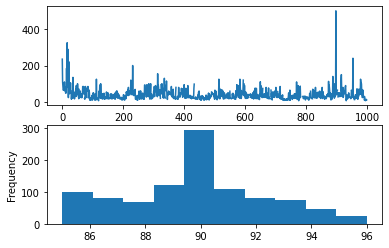

In [41]:
import matplotlib.pyplot as plt

%matplotlib inline

fig, axes = plt.subplots(2)

wine.iloc[:1000, :].loc[:, 'price'].plot(ax=axes[0])

wine.iloc[:1000, :].loc[:, 'points'].plot(ax=axes[1], kind='hist')